<img src="https://www.th-koeln.de/img/logo.svg" style="float:right;" width="200">

# 4th exercise: <font color="#C70039">Use Isolation Forest for anomaly detection</font>
* Course: AML
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Date:   10.11.2022
* Name: Tobias Esser
* matriculation number: 11134729

<img src="https://www.researchgate.net/publication/352017898/figure/fig1/AS:1029757483372550@1622524724599/Isolation-Forest-learned-iForest-construction-for-toy-dataset.png" style="float: center;" width="450">

---------------------------------
**GENERAL NOTE 1**: 
Please make sure you are reading the entire notebook, since it contains a lot of information on your tasks (e.g. regarding the set of certain paramaters or a specific computational trick), and the written mark downs as well as comments contain a lot of information on how things work together as a whole. 

**GENERAL NOTE 2**: 
* Please, when commenting source code, just use English language only. 
* When describing an observation please use English language, too
* This applies to all exercises throughout this course.  

---------------------

### <font color="ce33ff">DESCRIPTION</font>:
This notebook allows you for using the Isolation Forest algorithm for anomaly detection. Isolation Forest is an unsupervised learning algorithm that belongs to the ensemble decision trees family. The following <a href="https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf">paper</a> explains the details on its theory and implementation. 

-------------------------------------------------------------------------------------------------------------

### <font color="FFC300">TASKS</font>:
The tasks that you need to work on within this notebook are always indicated below as bullet points. 
If a task is more challenging and consists of several steps, this is indicated as well. 
Make sure you have worked down the task list and commented your doings. 
This should be done by using markdown.<br> 
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab or use your local machine.
2. make sure you specified you name and your matriculation number in the header below my name and date. 
    * set the date too and remove mine.
3. read the entire notebook carefully 
    * add comments whereever you feel it necessary for better understanding
    * run the notebook for the first time. 

4. take the three data sets from exercize 1 and apply the isolation forest to them.
5. implement an appropriate visualisation (chart) that renders the result (anomaly={yes,no}) for every data point TOGETHER with the original data point in your data set.
-----------------------------------------------------------------------------------

### First example

In [10]:
from sklearn.ensemble import IsolationForest
import numpy as np
from numpy.random import randn

np.random.seed(1)
random_data = np.random.randn(50000,2)  * 20 + 20

This code will output the predictions for each data point in an array. If the result is -1, it means that this specific data point is an outlier. If the result is 1, then it means that the data point is not an outlier.

In [11]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html
isolation_forest1 = IsolationForest(max_samples=100, random_state = 1, contamination= 'auto')

# Note, that fit and predict is called mutually (compare with code below!)
# Performs a fit on data and returns labels for that data
outlier_labels = isolation_forest1.fit_predict(random_data)

outlier_labels[0:200]

array([-1,  1, -1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,
       -1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1,
       -1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
       -1, -1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1])

### Second example

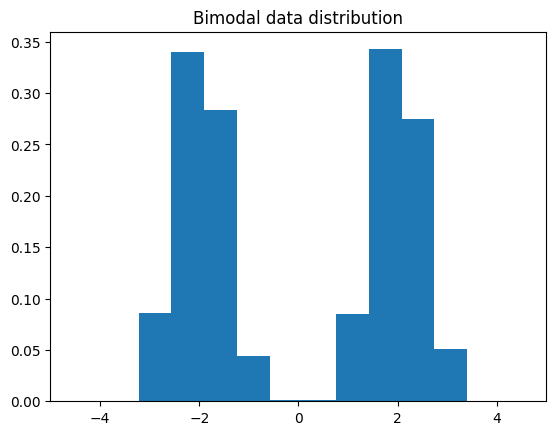

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# create a bimodal data distribution and visualize it
bimod_data = np.concatenate((np.random.normal(loc=-2,scale=.5,size=500), 
                             np.random.normal(loc=2, scale=.5,size=500)))

plt.hist(bimod_data, density=True)
plt.xlim([-5, 5])
plt.title("Bimodal data distribution")
plt.show()

Note, that there are three regions where the data has low probability to appear: 
* one on the right side of the distribution
* another one on the left
* and another around zero. 

Let's see if the IsolationForest is able to identify these three regions

In [13]:
# create the IF with n=100 estimators (remember IF is a ensemble method)
isolation_forest2 = IsolationForest(n_estimators=100)
isolation_forest2.fit(bimod_data.reshape(-1, 1))

# create a test data set for rasterizing the x-axis the get the anomaly score for it.
anomaly_score_test_data = np.linspace(-6, 6, 200).reshape(-1,1)

# get the anomaly score (y) for each testing data point on x 
anomaly_score = isolation_forest2.decision_function(anomaly_score_test_data)
# classify into an outlier or not (asc < 0 -> outlier)
outlier_labels = isolation_forest2.predict(anomaly_score_test_data)

Visualization of the Isolation forest:

In [14]:
import pandas as pd
import seaborn as sns

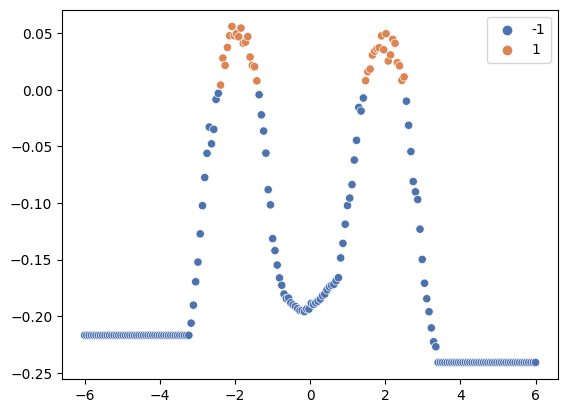

In [15]:
sns.scatterplot(x=np.squeeze(anomaly_score_test_data),y=anomaly_score,hue=outlier_labels,palette="deep")
plt.show()

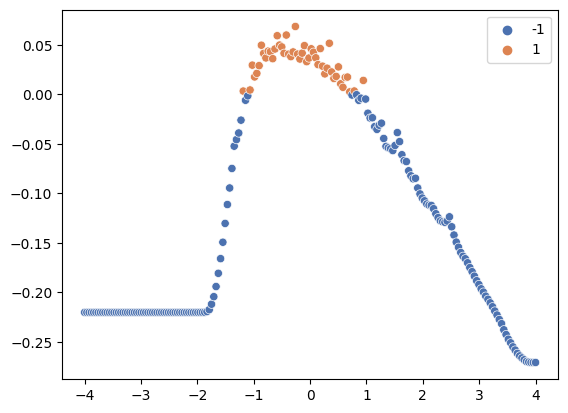

In [16]:
df1 = pd.read_csv('data/loans_income.csv')
data1 = df1['x'].to_numpy()
normalized_data1 = (data1-data1.mean())/data1.std()
# create a test data set for rasterizing the x-axis the get the anomaly score for it.
anomaly_score_test_data = np.linspace(-4, 4, 200).reshape(-1,1)

# create the IF with n=100 estimators (remember IF is a ensemble method)
isolation_forest2 = IsolationForest(n_estimators=5000)
isolation_forest2.fit(normalized_data1.reshape(-1, 1))

# get the anomaly score (y) for each testing data point on x 
anomaly_score = isolation_forest2.decision_function(anomaly_score_test_data)
# classify into an outlier or not (asc < 0 -> outlier)
outlier_labels = isolation_forest2.predict(anomaly_score_test_data)
sns.scatterplot(x=np.squeeze(anomaly_score_test_data),y=anomaly_score,hue=outlier_labels,palette="deep")
plt.show()

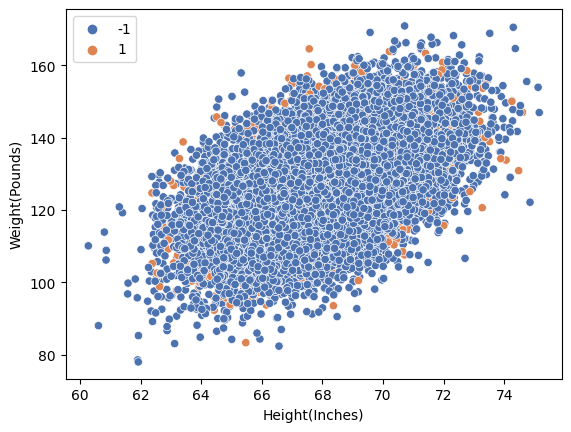

In [20]:
df2 = pd.read_csv('data/SOCR-HeightWeight.csv')
height = df2['Height(Inches)']
weight = df2['Weight(Pounds)']
data2 = np.vstack((height, weight)).T
normalized_data2 = (data2-data2.mean())/data2.std()

# create a test data set for rasterizing the x-axis the get the anomaly score for it.
anomaly_score_test_data = np.linspace(-4, 4, len(height)).reshape(-1,1)

# create the IF with n=100 estimators (remember IF is a ensemble method)
isolation_forest2 = IsolationForest(n_estimators=5000)
isolation_forest2.fit(normalized_data2.reshape(-1, 1))

# get the anomaly score (y) for each testing data point on x 
anomaly_score = isolation_forest2.decision_function(anomaly_score_test_data)
# classify into an outlier or not (asc < 0 -> outlier)
outlier_labels = isolation_forest2.predict(anomaly_score_test_data)
sns.scatterplot(x=height,y=weight,hue=outlier_labels,palette="deep")
plt.show()

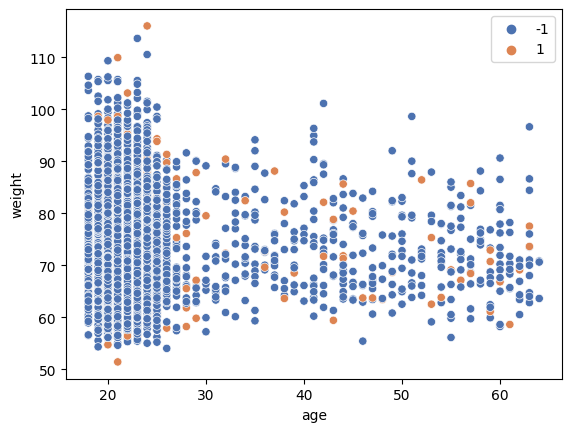

In [31]:
df3 = pd.read_csv("https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv")
weight2 = df3["weight"]
age = df3['age']
data3 = np.vstack((weight2, age)).T
normalized_data3 = (data3-data3.mean())/data3.std()
# create a test data set for rasterizing the x-axis the get the anomaly score for it.
anomaly_score_test_data = np.linspace(-4, 4, len(weight2)).reshape(-1,1)

# create the IF with n=100 estimators (remember IF is a ensemble method)
isolation_forest2 = IsolationForest(n_estimators=5000)
isolation_forest2.fit(normalized_data3.reshape(-1, 1))

# get the anomaly score (y) for each testing data point on x 
anomaly_score = isolation_forest2.decision_function(anomaly_score_test_data)
# classify into an outlier or not (asc < 0 -> outlier)
outlier_labels = isolation_forest2.predict(anomaly_score_test_data)
sns.scatterplot(x=age,y=weight2,hue=outlier_labels,palette="deep")
plt.show()